In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
def d(x_1,x_2):
    return np.sqrt(np.sum((x_1-x_2)**2))

def d2(x_1,x_2):
    return np.sum((x_1-x_2)**2)

def triplet_probabilities(triplets):
    ''' $$ p_{ij\ell} = \frac{\exp(-\| \mathbf{x}_i - \mathbf{x}_j \|^2)}{
    \exp(-\| \mathbf{x}_i - \mathbf{x}_j \|^2) +
    \exp(-\| \mathbf{x}_i - \mathbf{x}_\ell \|^2)} $$'''
    probabilities = np.zeros(len(triplets))
    for i,(x_i,x_j,x_l) in enumerate(triplets):
        d_ij = d2(x_i,x_j)
        d_il = d2(x_i,x_l)
        probabilities[i] = 1.0 / (1+ np.exp(d_ij - d_il))
        #probabilities[i] = np.exp(-d2(x_i,x_j)) / (np.exp(-d2(x_i,x_j)) + np.exp(-d2(x_i,x_l)))
    return probabilities

In [ ]:
from sklearn.neighbors import 

In [ ]:
def tripletify(X,y):
    

In [7]:
from sklearn.datasets import load_digits
X,y = load_digits().data,load_digits().target

In [4]:
def generate_triplet(X,Y):
    x_ind = np.random.randint(len(X))
    x,y = X[x_ind],Y[x_ind]
    x_close_ind = np.random.randint(len(X[Y==y]))
    x_far_ind = np.random.randint(len(X[Y!=y]))
    x_close = X[Y==y][x_close_ind]
    x_far = X[Y!=y][x_far_ind]
    return x,x_close,x_far

In [8]:
triplets = [generate_triplet(X,y) for _ in range(10000)]

In [ ]:
# recall log (x / y) = log(x) - log(y)
# 

In [18]:
probs = triplet_probabilities(triplets)

/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/IPython/kernel/__main__.py:15: RuntimeWarning: overflow encountered in exp


In [19]:
sum(probs==1)

8719

In [20]:
sum(probs==np.nan)

0

In [22]:
probs.min()

0.0

In [44]:
x = np.linspace(0,100,100)
y = np.linspace(0,100,100)

In [57]:
def f(x,y):
    return np.log(np.exp(-x) / (np.exp(-x) + np.exp(-y)))

In [58]:
grid = np.zeros((len(x),len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        grid[i,j] = f(x[i],y[j])

<matplotlib.colorbar.Colorbar instance at 0x2137a3440>

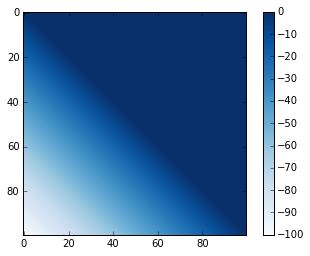

In [59]:
plt.imshow(grid,cmap='Blues')
plt.colorbar()

In [60]:
def f(x,y,alpha=10):
    a12 = -(alpha+1.0)/2
    return (1+(x / alpha))**a12 / ((1+(x/alpha))**a12 + (1+(y/alpha))**a12)

<matplotlib.colorbar.Colorbar instance at 0x33dcc2248>

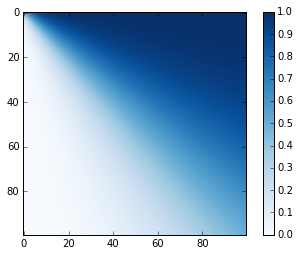

In [70]:
grid = np.zeros((len(x),len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        grid[i,j] = f(x[i],y[j],5)
        
plt.imshow(grid,cmap='Blues')
plt.colorbar()